<a href="https://colab.research.google.com/github/Chilefase/Tradespace/blob/master/Pareto_Drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt

In [ ]:
def is_pareto(costs, where,return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    if where =='TopLeft':
        where=1
    elif where =='TopRight':
        where =2
    elif where =='BottomLeft':
        where =3
    elif where =='BottomRight':
        where =4
    elif where not in [1,2,3,4]:
        raise NotImplementedError()
    #lt<
    #gt>
    if where == 3:
        # op1 = 1
        op2 = operator.lt
    elif where ==2:
        # op1 = 1
        op2 = operator.gt
    elif where ==4:
        x = costs.transpose()[0]*-1
        y = costs.transpose()[1]
        costs = np.array([x,y]).transpose()

        op2 = operator.lt
    elif where ==1:
        x = costs.transpose()[0]*-1
        y = costs.transpose()[1]
        costs = np.array([x,y]).transpose()
        op2 = operator.gt
    
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
    # while op1(next_point_index,len(costs)):
        # nondominated_point_mask = np.any(costs>costs[next_point_index], axis=1)
        nondominated_point_mask = np.any(op2(costs,costs[next_point_index]), axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

In [ ]:
file_name = 'pareto_example.csv'
df = pd.read_csv(file_name, header=None)
xy = df.to_numpy()
pareto = is_pareto(xy, 'BottomLeft')
df_out = pd.DataFrame(xy[pareto])
df_out = df_out.sort_values(by=[0])
df_out.to_csv('pareto_points.csv')

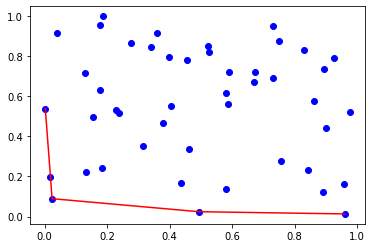

In [ ]:
fig,ax = plt.subplots()
ax.scatter(df[0],df[1],color='b')
ax.plot(df_out[0],df_out[1],color='r')
fig.show()